# KModes Clustering Analysis

In [ ]:
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'capstone-400517' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=capstone-400517:US:bquxjob_bfbd722_18b725d9f3e)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
## Query to get LOS AND TOTAL CHARGE FOR PATIENTS WITH ASTHMA AND OTHER DISEASES

query = """

SELECT fc.*, kg.DXCCSR_Default_DX1
FROM `capstone-400517.capstone2.for_clustering` AS fc
LEFT JOIN `capstone-400517.capstone2.kid_GPRS` AS kg
ON fc.recnum = kg.recnum

"""


In [ ]:
# Running this code will display the query used to generate your previous job

job = client.query(query) # Job ID inserted based on the query results selected to explore
print(job.query)



SELECT fc.*, kg.DXCCSR_Default_DX1
FROM `capstone-400517.capstone2.for_clustering` AS fc
LEFT JOIN `capstone-400517.capstone2.kid_GPRS` AS kg
ON fc.recnum = kg.recnum




## Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Filtering only for RSP009
results = job.to_dataframe()
results = results[results['DXCCSR_Default_DX1']== 'RSP009']

# Creating Clusters with Kmodes clustering algorithm

In [ ]:
# Install K-Modes ML library

!pip install kmodes

In [ ]:
# Import necessary libraries from KModes and create clusters


from kmodes.kmodes import KModes
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
df_encoded = encoder.fit_transform(df_kmode)

km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#Check of the clusters created in vector format

df_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
# Fit the cluster

clusters = km.fit_predict(df_encoded)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13545, cost: 267407.0
Run 1, iteration: 2/100, moves: 5912, cost: 267407.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10683, cost: 268708.0
Run 2, iteration: 2/100, moves: 2680, cost: 264408.0
Run 2, iteration: 3/100, moves: 4272, cost: 264408.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8342, cost: 277410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12081, cost: 265445.0
Run 4, iteration: 2/100, moves: 3408, cost: 265445.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 13530, cost: 276501.0
Best run was number 2


## Checking optimal cluster numbers

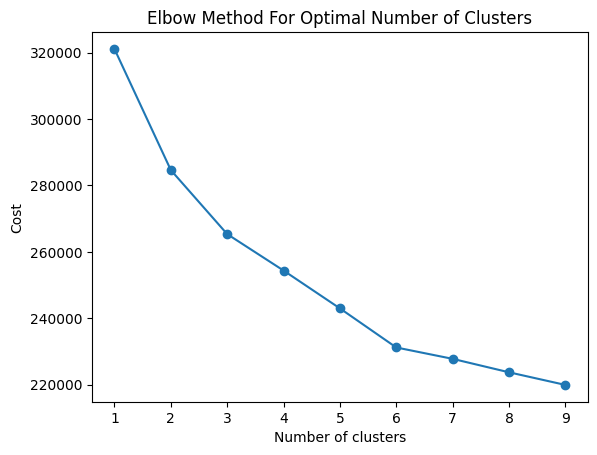

In [ ]:
# Checking the optimal number of clusters using Elbow method

import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

costs = []
for num_clusters in range(1, 10):
    km = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=0)
    km.fit(df_encoded)
    costs.append(km.cost_)

plt.plot(range(1, 10), costs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [ ]:
# Join the cluster results to the original table

df_kmode['Cluster'] = clusters

In [ ]:
# Using dataframe df_kmode: save to csv file for future analysis and visualization

df_kmode.to_csv('df_kmode_Asthma_primary_3.csv', index=False)


In [ ]:
! jupyter nbconvert  --to html "/content/cluster_KModes_with_Primary_Asthma.ipynb"

[NbConvertApp] Converting notebook /content/cluster_KModes_with_Primary_Asthma.ipynb to html
[NbConvertApp] Writing 752805 bytes to /content/cluster_KModes_with_Primary_Asthma.html
